In [ ]:
! pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

In [2]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 341M/346M [00:06<00:00, 55.0MB/s]
100% 346M/346M [00:06<00:00, 55.2MB/s]


In [ ]:
!unzip /content/intel-image-classification.zip

In [4]:
import cv2
import os
import matplotlib.pyplot as plt
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten

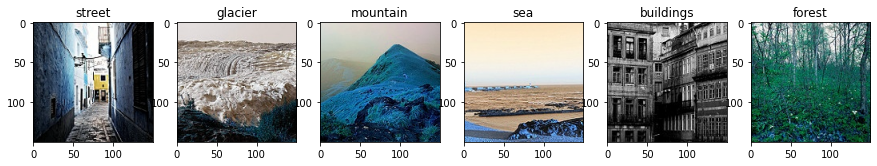

In [5]:
w = 10
h = 10
fig = plt.figure(figsize=(15,10))
columns = 6
rows = 1
fielName = "/content/seg_train/seg_train"

for i in range(0, columns*rows ):
  folderName = os.path.join((fielName), os.listdir(fielName)[i])
  img = cv2.imread(folderName+'/'+(os.listdir(os.path.join((fielName), os.listdir(fielName)[i]))[i]))
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(img)
  plt.title(os.path.basename(folderName))

plt.show()

In [6]:
batch_size = 32
resize = (227, 227)
train_datagen = ImageDataGenerator(
        rescale=1./255,) 

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/seg_train/seg_train', 
        target_size=resize, 
        batch_size=batch_size,
        class_mode='categorical',)  

validation_generator = test_datagen.flow_from_directory(
        '/content/seg_test/seg_test',
        target_size=resize,
        batch_size=batch_size,
        class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [7]:
model = Sequential() 
model.add(Conv2D(96, (11,11), (4,4), input_shape=(227,227,3), activation="relu")) 
model.add(MaxPool2D((3,3), (2,2))) 
model.add(Conv2D(256, (5,5), padding="same", activation="relu")) 
model.add(MaxPool2D((3,3), (2,2))) 
model.add(Conv2D(384, (3,3), padding="same", activation="relu")) 
model.add(Conv2D(384, (3,3), padding="same", activation="relu")) 
model.add(Conv2D(256, (3,3), padding="same", activation="relu")) 
model.add(MaxPool2D((3,3), (2,2))) 
model.add(Flatten()) 
model.add(Dense(4096, activation="relu")) 
model.add(Dropout(0.5)) 
model.add(Dense(4096, activation="relu")) 
model.add(Dense(6, activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       8

In [9]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

In [10]:
model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=20)

Epoch 1/20
439/439 [==============================] - 83s 117ms/step - loss: 1.3492 - accuracy: 0.4728 - val_loss: 0.9453 - val_accuracy: 0.6213
Epoch 2/20
439/439 [==============================] - 49s 111ms/step - loss: 0.9702 - accuracy: 0.6156 - val_loss: 0.8955 - val_accuracy: 0.6433
Epoch 3/20
439/439 [==============================] - 49s 111ms/step - loss: 0.8720 - accuracy: 0.6554 - val_loss: 0.8435 - val_accuracy: 0.6797
Epoch 4/20
439/439 [==============================] - 49s 111ms/step - loss: 0.8155 - accuracy: 0.6890 - val_loss: 0.7577 - val_accuracy: 0.7167
Epoch 5/20
439/439 [==============================] - 49s 111ms/step - loss: 0.7649 - accuracy: 0.7022 - val_loss: 0.7282 - val_accuracy: 0.7287
Epoch 6/20
439/439 [==============================] - 49s 111ms/step - loss: 0.7293 - accuracy: 0.7178 - val_loss: 0.7102 - val_accuracy: 0.7330
Epoch 7/20
439/439 [==============================] - 49s 111ms/step - loss: 0.7171 - accuracy: 0.7267 - val_loss: 0.7668 - val_ac